In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from scipy.stats import zscore

import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# current_working_directory = os.getcwd()
# print(f"현재 파이썬 코드가 실행되는 디렉토리: {current_working_directory}\n")

file_path_absolute ='C:/Users/mumu1/Desktop/project_movie_data/project_dataset/olist_orders_dataset.csv'
o_df_order = pd.read_csv(file_path_absolute, encoding='ISO-8859-1')

display(o_df_order.head())

# orders 데이터 탐색 : 누락, 중복, 이상
o_df_order.describe()
o_df_order.info()
df_order = o_df_order.copy()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [2]:
%pip install pandas-summary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
o_df_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# 결측값 확인
# 1. 결측치를 확인할 컬럼 리스트 정의
missing_value_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# 2. 각 컬럼별로 결측치 여부를 확인하는 불리언 마스크(Boolean Mask) 생성
# 'isnull()' 함수는 결측치(NaN)일 때 True를 반환합니다.
approved_at_na = df_order['order_approved_at'].isnull()
carrier_date_na = df_order['order_delivered_carrier_date'].isnull()
customer_date_na = df_order['order_delivered_customer_date'].isnull()

# 3. 세 가지 마스크를 '|' (or) 연산자로 결합
# 이 조건들 중 하나라도 True인 행을 선택합니다.
na_mask = approved_at_na | carrier_date_na | customer_date_na

# 4. 마스크를 사용하여 결측값이 있는 행만 필터링
df_na = df_order[na_mask]

# 5. 필터링된 데이터의 일부를 확인
print("결측값이 있는 행의 데이터 샘플:")
print(df_na.head())

# 6. 결측값이 있는 행의 개수 확인
print(f"\n결측값이 있는 총 행의 수: {len(df_na)}")


결측값이 있는 행의 데이터 샘플:
                             order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   

    order_status order_purchase_timestamp    order_approved_at  \
6       invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44       shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103     invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154      shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaN                           NaN   
4

In [16]:
# 결측률
print(df_order.isnull().sum() / len(df_order))

# 5%이하 3개 컬럼의 결측치 제거
df_order.dropna(subset=['order_approved_at'], inplace=True)
df_order.dropna(subset=['order_delivered_carrier_date'], inplace=True)
df_order.dropna(subset=['order_delivered_customer_date'], inplace=True)

# 변경사항 확인
print("결측치 제거 후 df_order의 정보:")
print(df_order.info())

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64
결측치 제거 후 df_order의 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null 

In [34]:
# 이상치 탐지: 계산한 배송시간 차이가 크거나 작은 경우
print('\n=== 이상값 확인 ===')

# 데이터 타입 변환
df_order["order_approved_at"] = pd.to_datetime(df_order["order_approved_at"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_delivered_carrier_date"] = pd.to_datetime(df_order["order_delivered_carrier_date"])
df_order["order_delivered_customer_date"] = pd.to_datetime(df_order["order_delivered_customer_date"])
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_estimated_delivery_date"] = pd.to_datetime(df_order["order_estimated_delivery_date"])

# 시간 차이 계산 (일 단위)
# 결제까지 걸린 시간: 주문승인일 - 결제일
df_order["purchase_to_approved"] = (df_order["order_approved_at"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400
# 주문-배송 걸린 시간: 배송완료일 - 주문승인일
df_order["approved_to_carrier"] = (df_order["order_delivered_carrier_date"] - df_order["order_approved_at"]).dt.total_seconds()/86400
# 택배사-배송 걸린 시간: 배송완료일 - 택배사 전달일
df_order["carrier_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_delivered_carrier_date"]).dt.total_seconds()/86400
# 계산-배송 걸린 시간: - 배송완료일 - 주문계산일
df_order["purchase_to_customer"] = (df_order["order_delivered_customer_date"] - df_order["order_purchase_timestamp"]).dt.total_seconds()/86400

# 모든 시간 계산 컬럼에서 음수 값만 찾기
# 시간 계산 컬럼 리스트
time_cols = ["purchase_to_approved","approved_to_carrier","carrier_to_customer","purchase_to_customer"]

# 각 컬럼별 음수 개수 계산
neg_counts = {col: (df_order[col] < 0).sum() for col in time_cols}

# 전체 음수 개수 (한 행이라도 음수인 경우)
total_neg = df_order[(df_order[time_cols] < 0).any(axis=1)].shape[0]

# 결과 출력
print("컬럼별 음수 개수:", neg_counts)
print("전체 음수 개수 (한 행이라도 음수):", total_neg)


=== 이상값 확인 ===
컬럼별 음수 개수: {'purchase_to_approved': np.int64(0), 'approved_to_carrier': np.int64(0), 'carrier_to_customer': np.int64(0), 'purchase_to_customer': np.int64(0)}
전체 음수 개수 (한 행이라도 음수): 0


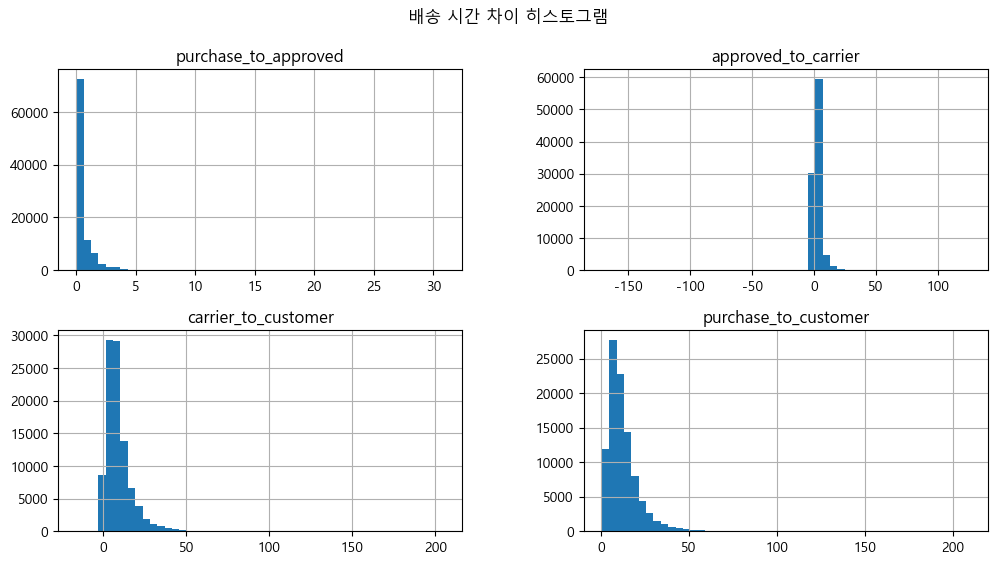

=== Z-score 기준 이상치 비율 (|Z|>3) ===
purchase_to_approved: 2.26%
approved_to_carrier: 1.92%
carrier_to_customer: 1.64%
purchase_to_customer: 1.63%

=== IQR 기준 이상치 비율 ===
purchase_to_approved: 9.26%
approved_to_carrier: 5.80%
carrier_to_customer: 5.26%
purchase_to_customer: 5.08%


In [10]:
# 이상치 탐지 시각화

# 1️⃣ 히스토그램 시각화
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("배송 시간 차이 히스토그램")
plt.show()

# 2️⃣ 극단치 비율 계산
print("=== Z-score 기준 이상치 비율 (|Z|>3) ===")
for col in time_cols:
    z = zscore(df_order[col].dropna())
    outlier_ratio = (abs(z) > 3).mean() * 100
    print(f"{col}: {outlier_ratio:.2f}%")

# 3️⃣ IQR 기반 이상치 비율 계산
print("\n=== IQR 기준 이상치 비율 ===")
for col in time_cols:
    data = df_order[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    iqr_outlier_ratio = ((data < lower_bound) | (data > upper_bound)).mean() * 100
    print(f"{col}: {iqr_outlier_ratio:.2f}%")

In [23]:
# 이상치 제거
time_cols = ["purchase_to_approved", "approved_to_carrier", "carrier_to_customer", "purchase_to_customer"]

def remove_iqr_outliers_combined(df_order, cols):
    # 빈 마스크(mask) 생성
    combined_mask = pd.Series([True] * len(df_order), index=df_order.index)
    
    for col in cols:
        data = df_order[col].dropna()
        if data.empty:
            print(f"Warning: No data to analyze for {col}. Skipping.")
            continue
            
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 각 컬럼별로 이상치 범위를 벗어나지 않는 행을 True로 하는 마스크 생성
        col_mask = (df_order[col] >= lower_bound) & (df_order[col] <= upper_bound)
        
        # 최종 마스크에 현재 컬럼의 마스크를 결합 (AND 연산)
        # combined_mask = combined_mask & col_mask
        # 결측치가 있는 경우를 고려하여 `.fillna(False)`를 사용하면 더 안전합니다.
        combined_mask &= col_mask.fillna(True)
        
        print(f"'{col}'에 대한 마스크 생성 완료.")
        
    # 최종 마스크를 사용하여 df_order 생성
    df_order = df_order[combined_mask].copy()
    
    initial_len = len(df_order)
    removed_count = initial_len - len(df_order)
    
    print(f"\n총 이상치 제거: {initial_len} -> {len(df_order)} (제거된 행 수: {removed_count})")
    
    return df_order

# 실행
df_order = remove_iqr_outliers_combined(df_order, time_cols)

# 최종 df_order 데이터프레임의 상태 확인
print("\n[최종 df_order의 기초 통계량]")
print(df_order[time_cols].describe())

'purchase_to_approved'에 대한 마스크 생성 완료.
'approved_to_carrier'에 대한 마스크 생성 완료.
'carrier_to_customer'에 대한 마스크 생성 완료.
'purchase_to_customer'에 대한 마스크 생성 완료.

총 이상치 제거: 78243 -> 78243 (제거된 행 수: 0)

[최종 df_order의 기초 통계량]
       purchase_to_approved  approved_to_carrier  carrier_to_customer  \
count          78243.000000         78243.000000         78243.000000   
mean               0.213960             2.205594             7.855824   
std                0.392342             1.730066             5.227605   
min                0.000000            -1.333345            -2.892384   
25%                0.008681             0.868738             3.970093   
50%                0.012650             1.712755             6.937755   
75%                0.100260             3.159306            10.946759   
max                1.498750             7.626204            23.921458   

       purchase_to_customer  
count          78243.000000  
mean              10.275378  
std                5.575391  
min       

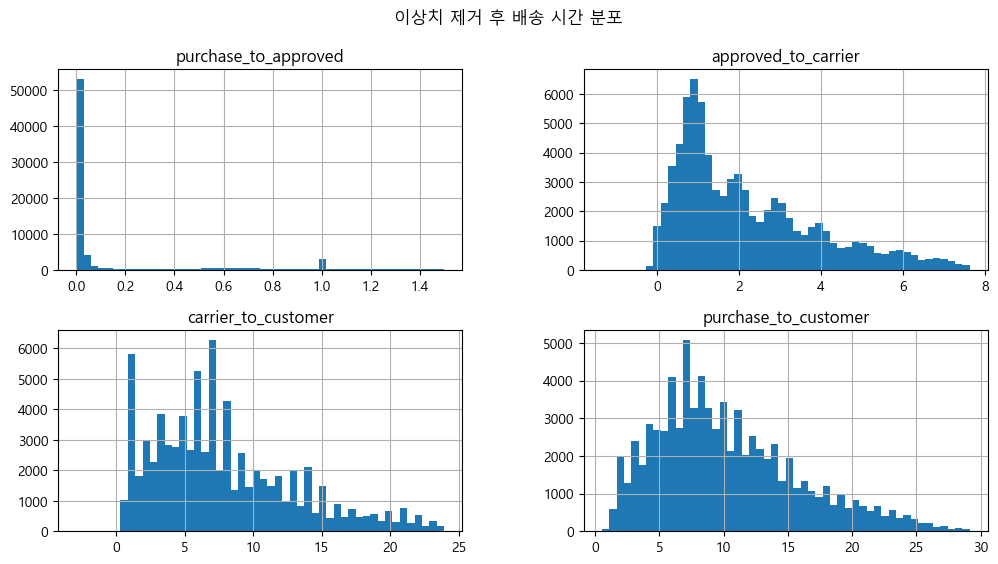

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,purchase_to_approved,approved_to_carrier,carrier_to_customer,purchase_to_customer
count,77694,77694,77694,77694,77694.000000,77694.000000,77694.000000,77694.000000
mean,2018-01-02 11:09:14.460395776,2018-01-02 16:14:00.467886848,2018-01-04 21:33:17.827760128,2018-01-12 18:20:05.613895680,0.211644,2.221729,7.865831,10.299203
min,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-11 13:46:32,0.000000,0.000174,0.000000,0.533414
25%,2017-09-10 18:02:16.750000128,2017-09-10 19:43:28.500000,2017-09-12 20:04:04.500000,2017-09-19 18:45:28.249999872,0.008669,0.880414,3.970243,6.166548
50%,2018-01-20 09:12:31.500000,2018-01-20 11:57:48.500000,2018-01-23 18:20:05,2018-01-31 17:21:09,0.012593,1.728976,6.942853,9.165376
75%,2018-05-09 10:38:10,2018-05-09 14:15:06,2018-05-10 18:29:00,2018-05-17 19:29:21,0.092442,3.172173,10.957297,13.545168
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-30 14:58:00,2018-09-10 22:38:43,1.498750,7.626204,23.921458,29.149572
std,NaN,NaN,NaN,NaN,0.390404,1.724586,5.232599,5.577010


In [24]:
# 이상치 제거 후 배송 시간 분포 확인
df_order[time_cols].hist(bins=50, figsize=(12,6))
plt.suptitle("이상치 제거 후 배송 시간 분포")
plt.show()

# 이상치 확인 후 도메인 규칙 기반 제거
df_order = df_order[df_order['approved_to_carrier'] >= 0]
df_order = df_order[df_order['carrier_to_customer'] >= 0]

# 기초 통계 확인
df_order[time_cols].describe()

df_order.describe()
# df_order = df_deliverd_clean


In [26]:
# 파일들이 있는 폴더 경로
folder_path = 'C:/Users/mumu1/Desktop/project_movie_data/project_dataset'

# 파일 이름을 변수에 할당
o_df_customers = pd.read_csv(os.path.join(folder_path, 'olist_customers_dataset.csv'), encoding='ISO-8859-1')
o_df_geolocation = pd.read_csv(os.path.join(folder_path, 'olist_geolocation_dataset.csv'), encoding='ISO-8859-1')
o_df_order_items = pd.read_csv(os.path.join(folder_path, 'olist_order_items_dataset.csv'), encoding='ISO-8859-1')
o_df_order_payments = pd.read_csv(os.path.join(folder_path, 'olist_order_payments_dataset.csv'), encoding='ISO-8859-1')
o_df_order_reviews = pd.read_csv(os.path.join(folder_path, 'olist_order_reviews_dataset.csv'), encoding='ISO-8859-1')
o_df_products = pd.read_csv(os.path.join(folder_path, 'olist_products_dataset.csv'), encoding='ISO-8859-1')
o_df_sellers = pd.read_csv(os.path.join(folder_path, 'olist_sellers_dataset.csv'), encoding='ISO-8859-1')



print("✅ 모든 파일이 개별적으로 메모리에 로드되었습니다.")

✅ 모든 파일이 개별적으로 메모리에 로드되었습니다.


In [27]:
### for문을 이용한 사본 만들기

# 1. 원본 데이터프레임들을 리스트에 담기
original_dfs = [
    o_df_customers, o_df_geolocation, o_df_order_items,
    o_df_order_payments, o_df_order_reviews, o_df_products,
    o_df_sellers
]

# 2. 각 데이터프레임의 변수명을 문자열로 리스트에 담기
original_names = [
    'o_df_customers', 'o_df_geolocation', 'o_df_order_items',
    'o_df_order_payments', 'o_df_order_reviews', 'o_df_products',
    'o_df_sellers'
]

# 3. 반복문을 통해 사본을 만들고 전역 변수에 할당
for original_df, original_name in zip(original_dfs, original_names):
    # 'o_df_'를 제거한 새로운 변수명 생성
    new_name = original_name[2:]
    
    # exec() 함수를 사용하여 동적으로 변수 할당
    # f-string을 이용해 'df_변수명 = 원본.copy()' 형태의 코드를 실행합니다.
    exec(f"{new_name} = original_df.copy()")
    print(f"'{original_name}'의 사본 '{new_name}' 생성 완료")

df_customers.head()

'o_df_customers'의 사본 'df_customers' 생성 완료
'o_df_geolocation'의 사본 'df_geolocation' 생성 완료
'o_df_order_items'의 사본 'df_order_items' 생성 완료
'o_df_order_payments'의 사본 'df_order_payments' 생성 완료
'o_df_order_reviews'의 사본 'df_order_reviews' 생성 완료
'o_df_products'의 사본 'df_products' 생성 완료
'o_df_sellers'의 사본 'df_sellers' 생성 완료


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# # 7개 데이터프레임의 결측값 분석
# def check_missing(dfs, df_names):
#     for df, name in zip(dfs, df_names):
#         print(f"\n📊 {name} 데이터프레임 결측값 분석")
        
#         missing_info = df.isnull().sum()
#         m_pct = (missing_info / len(df)) * 100
        
#         if missing_info.sum() == 0:
#             print("✅ 결측값 없음. 완전")
#         else:
#             print("⚠️ 결측치 존재")
#             missing_sum = pd.DataFrame({
#                 '결측수': missing_info,
#                 '결측율(%)': m_pct,
#             }).round(2)
#             missing_sum = missing_sum[missing_sum['결측수'] > 0]
#             display(missing_sum)

# # 사용 예시
# original_dfs = [ 
#     o_df_customers, o_df_geolocation, o_df_order_items,
#     o_df_order_payments, o_df_order_reviews, o_df_products,
#     o_df_sellers
# ]

# df_names = [
#     "customers", "geolocation", "order_items",
#     "order_payments", "order_reviews", "products",
#     "sellers"
# ]

# check_missing(original_dfs, df_names)



📊 customers 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 geolocation 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 order_items 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 order_payments 데이터프레임 결측값 분석
✅ 결측값 없음. 완전

📊 order_reviews 데이터프레임 결측값 분석
⚠️ 결측치 존재


,결측수,결측율(%)
review_comment_title,87656,88.34
review_comment_message,58247,58.70



📊 products 데이터프레임 결측값 분석
⚠️ 결측치 존재


,결측수,결측율(%)
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01



📊 sellers 데이터프레임 결측값 분석
✅ 결측값 없음. 완전


In [30]:
# 7개 파일 데이터 프로파일링

# --- 1. 함수 정의 ---
def get_data_profile(df: pd.DataFrame, df_name: str = "데이터"):
    """종합적인 데이터 프로파일링 함수"""

    print('=' * 70)
    print(f'📊 {df_name} 종합 데이터 품질 리포트')
    print('=' * 70)

    # 1. 기본 통계
    print(f'\n1. 기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- 수치형 변수: {len(df.select_dtypes(include=["number"]).columns)}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=["object"]).columns)}개')

    # 2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('✅ 결측값 없음. 완전')
    else:
        print('⚠️')
        missing_sum = pd.DataFrame({
            '결축수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결축수'] > 0]
        display(missing_sum)

    # 3. 수치형 변수 품질 분석
    print(f'\n3. 수치형 변수 품질 분석')
    num_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    for col in num_cols:
        col_data = df[col].dropna()
        if len(col_data) == 0:
            continue

        # 기본 통계
        stats = {
            '변수명': col,
            '평균': col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도': col_data.kurtosis(),
        }

        # 이상값 비율 (IQR)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        mask = (col_data < Q1 - 1.5 * IQR) | (col_data > Q3 + 1.5 * IQR)
        outliers = col_data[mask]
        stats['이상값비율(%)'] = (len(outliers) / len(col_data)) * 100

        # 유일값 비율
        stats['유일값비율(%)'] = (col_data.nunique() / len(col_data)) * 100

        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report).round(3)
    if not quality_df.empty:
        display(quality_df)

    # 4. 분포 이상 감지
    print(f'\n4. 분포 이상 감지')
    if not quality_df.empty:
        print(f'\n- 극심한 왜도 (|skewness|>2)')
        high_skews = quality_df[abs(quality_df['왜도']) > 2]['변수명'].to_list()
        
        if high_skews:
            print('⚠️')
            for var in high_skews:
                skew_val = quality_df[quality_df['변수명'] == var].iloc[0]['왜도']
                print(f'-- {var}: 왜도 = {skew_val:.3f}')
        else:
            print('-- ✅ 정상 범위 내 분포')

        print('\n- 높은 이상값 비율(>5%)')
        high_outliers = quality_df[quality_df['이상값비율(%)'] > 5]['변수명'].tolist()
        if high_outliers:
            print('⚠️')
            for var in high_outliers:
                outlier_pct = quality_df[quality_df['변수명'] == var].iloc[0]['이상값비율(%)']
                print(f'-- {var}: 이상값 {outlier_pct:.1f}%')
        else:
            print('-- ✅ 이상값 비율 양호')

    return quality_df


# --- 2. 7개 DF 프로파일링 ---
original_dfs = [ 
    o_df_customers, o_df_geolocation, o_df_order_items,
    o_df_order_payments, o_df_order_reviews, o_df_products,
    o_df_sellers
]

df_names = [
    "customers", "geolocation", "order_items",
    "order_payments", "order_reviews", "products", "sellers"
]

for df, name in zip(original_dfs, df_names):
    get_data_profile(df, name)


📊 customers 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 99441행 x 5열
- 메모리 사용량: 26.59mb
- 수치형 변수: 1개
- 범주형 변수: 4개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,customer_zip_code_prefix,35137.475,29797.939,1003,99990,0.779,-0.788,0.0,15.078



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
-- ✅ 정상 범위 내 분포

- 높은 이상값 비율(>5%)
-- ✅ 이상값 비율 양호
📊 geolocation 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 1000163행 x 5열
- 메모리 사용량: 129.46mb
- 수치형 변수: 3개
- 범주형 변수: 2개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,geolocation_zip_code_prefix,36574.166,30549.336,1001.000,99990.000,0.694,-0.941,0.000,1.901
1,geolocation_lat,-21.176,5.716,-36.605,45.066,1.565,2.850,16.821,71.724
2,geolocation_lng,-46.391,4.270,-101.467,121.105,-0.102,4.727,4.234,71.750



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
-- ✅ 정상 범위 내 분포

- 높은 이상값 비율(>5%)
⚠️
-- geolocation_lat: 이상값 16.8%
📊 order_items 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 112650행 x 7열
- 메모리 사용량: 35.99mb
- 수치형 변수: 3개
- 범주형 변수: 4개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,order_item_id,1.198,0.705,1.00,21.00,7.580,103.857,12.414,0.019
1,price,120.654,183.634,0.85,6735.00,7.923,120.828,7.481,5.298
2,freight_value,19.990,15.806,0.00,409.68,5.640,59.788,10.771,6.213



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- order_item_id: 왜도 = 7.580
-- price: 왜도 = 7.923
-- freight_value: 왜도 = 5.640

- 높은 이상값 비율(>5%)
⚠️
-- order_item_id: 이상값 12.4%
-- price: 이상값 7.5%
-- freight_value: 이상값 10.8%
📊 order_payments 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 103886행 x 5열
- 메모리 사용량: 16.23mb
- 수치형 변수: 3개
- 범주형 변수: 2개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,payment_sequential,1.093,0.707,1.0,29.00,16.180,370.594,4.357,0.028
1,payment_installments,2.853,2.687,0.0,24.00,1.655,2.550,6.077,0.023
2,payment_value,154.100,217.494,0.0,13664.08,9.254,241.828,7.682,27.989



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- payment_sequential: 왜도 = 16.180
-- payment_value: 왜도 = 9.254

- 높은 이상값 비율(>5%)
⚠️
-- payment_installments: 이상값 6.1%
-- payment_value: 이상값 7.7%
📊 order_reviews 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 99224행 x 7열
- 메모리 사용량: 39.12mb
- 수치형 변수: 1개
- 범주형 변수: 6개

2. 결측값 분석
⚠️


,결축수,결측율(%)
review_comment_title,87656,88.34
review_comment_message,58247,58.70



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,review_score,4.086,1.348,1,5,-1.364,0.508,14.689,0.005



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
-- ✅ 정상 범위 내 분포

- 높은 이상값 비율(>5%)
⚠️
-- review_score: 이상값 14.7%
📊 products 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 32951행 x 9열
- 메모리 사용량: 6.30mb
- 수치형 변수: 7개
- 범주형 변수: 2개

2. 결측값 분석
⚠️


,결축수,결측율(%)
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,product_name_lenght,48.477,10.246,5.0,76.0,-0.903,0.193,0.897,0.204
1,product_description_lenght,771.495,635.115,4.0,3992.0,1.962,4.829,6.425,9.152
2,product_photos_qty,2.189,1.737,1.0,20.0,2.193,7.264,2.625,0.059
3,product_weight_g,2276.472,4282.039,0.0,40425.0,3.605,15.134,13.812,6.689
4,product_length_cm,30.815,16.914,7.0,105.0,1.750,3.514,4.188,0.300
5,product_height_cm,16.938,13.638,2.0,105.0,2.140,6.679,5.742,0.310
6,product_width_cm,23.197,12.079,6.0,118.0,1.671,4.073,2.768,0.288



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- product_photos_qty: 왜도 = 2.193
-- product_weight_g: 왜도 = 3.605
-- product_height_cm: 왜도 = 2.140

- 높은 이상값 비율(>5%)
⚠️
-- product_description_lenght: 이상값 6.4%
-- product_weight_g: 이상값 13.8%
-- product_height_cm: 이상값 5.7%
📊 sellers 종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 3095행 x 4열
- 메모리 사용량: 0.59mb
- 수치형 변수: 1개
- 범주형 변수: 3개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,seller_zip_code_prefix,32291.059,32713.454,1001,99730,0.916,-0.858,0.0,72.569



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
-- ✅ 정상 범위 내 분포

- 높은 이상값 비율(>5%)
-- ✅ 이상값 비율 양호


In [ ]:
'''
customer 데이터 탐색: 이상치 처리 안함, 데이터 손실 최소화
customer states 컬럼: SP(상파울루 주), RJ (리우데자네이루 주)
'''
# orders_detasets = df_order / df_customers -- merge(customer_id)
# orders_detasets, order_payment -- merge(order_id): 결측, 이상 보고 나서 나중에

# df_order.info() #77694, 컬럼 12개
# df_customers.info() #99441 컬럼 5개

# 고객 정보 붙이기
df_order_customer = df_orders.merge(
    df_customers[['customer_id', 'customer_city']],  # 필요한 칼럼만
    on='customer_id',
    how='left'   # 주문은 반드시 유지, 고객 정보가 없으면 NaN
)

print(df_order_customer.shape)
print(df_order_customer.isnull().sum())


# df.head(), df.shape, df.isnull().sum()
# 과제 1: 지역별 고객들의 구매 패턴을 분석하여 RFM(Recency, Frequency, Monetary) 모델을 구축
R (Recency): 마지막 구매일
F (Frequency): 구매 횟수
M (Monetary): 구매 금액


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
